In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv("Price.csv")
data

,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,02/25/2018,W
1,गोलभेडा सानो,के.जी.,25,30,28,02/25/2018,W
2,अालु रातो,के.जी.,20,23,22,02/25/2018,W
3,अालु सेतो,के.जी.,18,20,19,02/25/2018,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,02/25/2018,W
...,...,...,...,...,...,...,...
99297,लसुन सुकेको नेपाली,के.जी.,600,620,610,02/15/2020,R
99298,ताजा माछा(रहु),के जी,320,330,325,02/15/2020,R
99299,ताजा माछा(बचुवा),के जी,280,300,290,02/15/2020,R
99300,ताजा माछा(छडी),के जी,280,300,290,02/15/2020,R


In [31]:
# convert cdate into pandas date
data['cdate']=pd.to_datetime(data['cdate'])
data.head()

,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype
0,गोलभेडा ठूलो(नेपाली),के.जी.,30,35,33,2018-02-25,W
1,गोलभेडा सानो,के.जी.,25,30,28,2018-02-25,W
2,अालु रातो,के.जी.,20,23,22,2018-02-25,W
3,अालु सेतो,के.जी.,18,20,19,2018-02-25,W
4,प्याज सुकेको भारतीय,के.जी.,44,46,45,2018-02-25,W


In [32]:

vegetable=set(data['कृषि उपज'].values)
len(vegetable)

120

In [33]:
 feature_df=[]
 for v in vegetable:
    for p_type in ['W','R']:
            # gettig last two days as features
            df_v=data[(data['कृषि उपज']==v) &(data['pricetype']==p_type)]# one one vegetable and that only one pricetype
            df_v = df_v.sort_values(by=['cdate'] ,ascending=False)
            
            if p_type=='W':
                df_v['type']=1
            else:
                df_v['type']=0
            
            df_v['t_1']=df_v.shift(-1)['औसत']
            df_v['t_2']=df_v.shift(-2)['औसत']
            feature_df.append(df_v)
feature_df            

[          कृषि उपज    ईकाइ  न्यूनतम  अधिकतम  औसत      cdate pricetype  type  \
 99170  प्याज हरियो  के.जी.      110     120  115 2020-02-15         W     1   
 99002  प्याज हरियो  के.जी.      110     120  115 2020-02-14         W     1   
 98839  प्याज हरियो  के.जी.      100     110  105 2020-02-13         W     1   
 98678  प्याज हरियो  के.जी.      100     115  108 2020-02-12         W     1   
 98518  प्याज हरियो  के.जी.      120     130  125 2020-02-11         W     1   
 ...            ...     ...      ...     ...  ...        ...       ...   ...   
 565    प्याज हरियो  के.जी.       70      75   73 2018-03-01         W     1   
 431    प्याज हरियो  के.जी.       70      75   73 2018-02-28         W     1   
 298    प्याज हरियो  के.जी.       75      80   78 2018-02-27         W     1   
 163    प्याज हरियो  के.जी.       90     100   95 2018-02-26         W     1   
 28     प्याज हरियो  के.जी.       90     100   95 2018-02-25         W     1   
 
          t_1    t_2  
 99170  115.0  

## Feature Extraction

In [34]:
feature_df=pd.concat(feature_df)
feature_df.head()


,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype,type,t_1,t_2
99170,प्याज हरियो,के.जी.,110,120,115,2020-02-15,W,1,115.0,105.0
99002,प्याज हरियो,के.जी.,110,120,115,2020-02-14,W,1,105.0,108.0
98839,प्याज हरियो,के.जी.,100,110,105,2020-02-13,W,1,108.0,125.0
98678,प्याज हरियो,के.जी.,100,115,108,2020-02-12,W,1,125.0,125.0
98518,प्याज हरियो,के.जी.,120,130,125,2020-02-11,W,1,125.0,125.0


In [35]:
feature_df.dropna(inplace=True)# deleting row containing NAN

feature_df.tail()


,कृषि उपज,ईकाइ,न्यूनतम,अधिकतम,औसत,cdate,pricetype,type,t_1,t_2
34020,सखरखण्ड,के.जी.,50,60,55,2018-11-22,R,0,55.0,55.0
33886,सखरखण्ड,के.जी.,50,60,55,2018-11-21,R,0,55.0,55.0
33752,सखरखण्ड,के.जी.,50,60,55,2018-11-20,R,0,55.0,55.0
33617,सखरखण्ड,के.जी.,50,60,55,2018-11-19,R,0,55.0,65.0
33484,सखरखण्ड,के.जी.,50,60,55,2018-11-18,R,0,65.0,65.0


In [36]:
feature_df=feature_df.sample(frac=1 ,random_state=1)# random shuffling of data
x=feature_df[['type','t_1','t_2']].values

In [37]:

x = np.insert(x, 0, values=1, axis = 1) #adding bias or intercept term
x


array([[  1.,   1.,  34.,  33.],
       [  1.,   0., 145., 145.],
       [  1.,   1., 145., 145.],
       ...,
       [  1.,   1.,  95.,  95.],
       [  1.,   1.,  19.,  19.],
       [  1.,   0.,  75.,  75.]])

In [38]:
print(x.shape)

(98822, 4)


In [39]:
y=feature_df['औसत'].values
print(y.shape)

(98822,)


# Train,Validation and Test set splitting

In [40]:

total=len(x)
train=int(0.6*total)
val=int(0.2*total)

x_train=x[:train]
y_train=y[:train].reshape(-1,1)

x_val=x[train:train+val]
y_val=y[train:train+val].reshape(-1,1)

x_test=x[train+val:]
y_test=y[train+val:].reshape(-1,1)

print(len(x_train),len(x_val),len(x_test))
print(len(y_train),len(y_val),len(y_test))


59293 19764 19765
59293 19764 19765


## Min_Max Normalization
to know max and min value from training set and used in validation and test set


In [41]:
x_train

array([[  1.,   1.,  34.,  33.],
       [  1.,   0., 145., 145.],
       [  1.,   1., 145., 145.],
       ...,
       [  1.,   0.,  48.,  53.],
       [  1.,   0., 275., 275.],
       [  1.,   0.,  75.,  75.]])

In [42]:
price_x=x_train[:,2:]
price_x

array([[ 34.,  33.],
       [145., 145.],
       [145., 145.],
       ...,
       [ 48.,  53.],
       [275., 275.],
       [ 75.,  75.]])

In [43]:

min_v=np.min(price_x)
max_v=np.max(price_x)
diff=max_v-min_v

def min_max_normalization(dataset):
    for i in range(0,dataset.shape[0]):# dataset.shape[0] no of rows
        for j in range(2,dataset.shape[1]):#dataset.shape[1] no of column
            dataset[i][j]=(dataset[i][j]-min_v)/diff 

In [44]:
min_max_normalization(x_train)
min_max_normalization(x_val)
min_max_normalization(x_test)

In [45]:
x_train

array([[1.        , 1.        , 0.0154703 , 0.01485149],
       [1.        , 0.        , 0.08415842, 0.08415842],
       [1.        , 1.        , 0.08415842, 0.08415842],
       ...,
       [1.        , 0.        , 0.02413366, 0.02722772],
       [1.        , 0.        , 0.16460396, 0.16460396],
       [1.        , 0.        , 0.04084158, 0.04084158]])

In [46]:

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(59293, 4)
(59293, 1)
(19764, 4)
(19764, 1)
(19765, 4)
(19765, 1)


## Model Building

In [47]:
def MSE(h,y):
    return 0.5**np.average((h-y)**2)

In [48]:
np.random.seed(42)

#hyperparameters
param = {
    'number_of_iterations': 1000,
    'learning_rate': 0.001
}

grid_param = {
    'number_of_iterations': [1000, 2000],
    'learning_rate': [0.001,0.1]
}

In [49]:


def train_model(x_train, y_train, x_val, y_val, param):
    W = np.random.rand(x_train.shape[1]).reshape(-1,1)
    train_error = []
    for i in range(1, param['number_of_iterations']):
        h_train = np.matmul(x_train, W)# h=xw
        train_loss = MSE(h_train, y_train)
        train_error.append(train_loss)  

        gradient = np.matmul(np.transpose(x_train),(h_train - y_train))/x_train.shape[0]
        W = W - param['learning_rate'] * gradient   
    h_val = np.matmul(x_val, W)
    val_loss = MSE(h_val, y_val)
    val_error=[val_loss]
    return W, train_error, val_error
#     print(param, val_loss)  





        
        

In [50]:
train_model(x_train, y_train, x_val, y_val,param)

(array([[62.07234651],
        [22.55133255],
        [ 8.45138368],
        [ 8.27417263]]),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0

In [51]:
import itertools
grid = list(itertools.product(grid_param['number_of_iterations'], grid_param['learning_rate']))
print(grid)

[(1000, 0.001), (1000, 0.1), (2000, 0.001), (2000, 0.1)]


In [52]:
for g in grid:
    p = {
        'number_of_iterations': g[0],
        'learning_rate': g[1]
    }

    
    train_model(x_train, y_train, x_val, y_val,p)


{'number_of_iterations': 1000, 'learning_rate': 0.001}


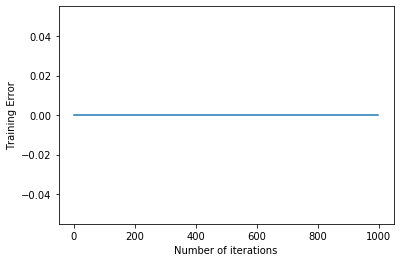

{'number_of_iterations': 1000, 'learning_rate': 0.1}


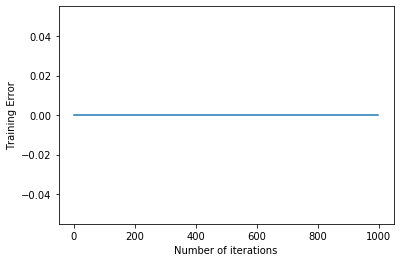

{'number_of_iterations': 2000, 'learning_rate': 0.001}


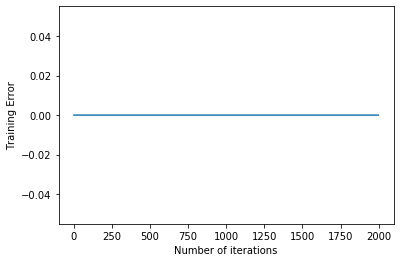

{'number_of_iterations': 2000, 'learning_rate': 0.1}


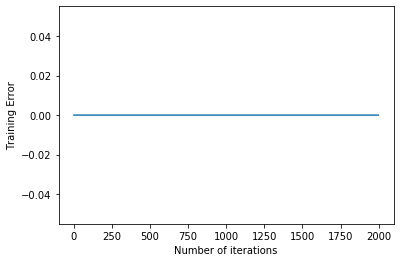

In [58]:


for g in grid:
    p={
    'number_of_iterations':g[0],
    'learning_rate':g[1],

    }
    print(p)
    Weights,train_error,val_error=train_model(x_train,y_train,x_val,y_val,p)
#     print(val_error)
    plt.plot(np.arange(len(train_error)),train_error)
    plt.xlabel("Number of iterations")
    plt.ylabel("Training Error")   
    plt.show()

# Model Evaluation

In [54]:
x_test ,y_test

(array([[1.        , 0.        , 0.03465347, 0.0470297 ],
        [1.        , 1.        , 0.05321782, 0.05321782],
        [1.        , 0.        , 0.09653465, 0.09653465],
        ...,
        [1.        , 1.        , 0.05321782, 0.05321782],
        [1.        , 1.        , 0.00618812, 0.00618812],
        [1.        , 0.        , 0.04084158, 0.04084158]]), array([[ 65],
        [ 95],
        [165],
        ...,
        [ 95],
        [ 21],
        [ 75]]))

## Model Fine Tunining

In [55]:
final_param = {'number_of_iterations':5000, 'learning_rate':0.01}
model_weights =  train_model(x_train,y_train,x_val,y_val,final_param)

In [56]:
model_weights= model_weights[0]

In [57]:
y_mean = np.mean(y_test)

h_test = np.matmul(x_test, model_weights)
n = x_test.shape[0]
k = x_test.shape[1] - 1

SST =np.sum(np.square(y_test - y_mean))
SSR =np.sum(np.square(h_test- y_mean))
SSE=np.sum(np.square(h_test-y_test))
R2 = 1 - SSE/SST
R2

0.3924140915292579